In [1]:
from vivarium.core.process import Process
from vivarium.core.store import Store
from vivarium.core.engine import Engine, pp
from vivarium.plots.topology import plot_topology
from vivarium.plots.simulation_output import plot_variables


# One big import here!!
# individual processes should also be imported here!!

# Load the required components

To run an E. coli model, you need a few things:
 * **sim_data**: the model parameters from wcEcoli.
 * **initial_state**: the initial state of the system -- a snapshot from wcEcoli.
 * **processes**: the modular processes, which are wired together to create the full model.

## load sim_data

In [2]:
# Make sure this is running out of vivarium-ecoli directory
import sys

sys.path[0] += '/..'
sys.path

['/Users/abhinavkumar/code/vivarium-ecoli/notebooks/..',
 '/Users/abhinavkumar/.pyenv/versions/3.8.5/lib/python38.zip',
 '/Users/abhinavkumar/.pyenv/versions/3.8.5/lib/python3.8',
 '/Users/abhinavkumar/.pyenv/versions/3.8.5/lib/python3.8/lib-dynload',
 '',
 '/Users/abhinavkumar/.pyenv/versions/3.8.5/envs/v-ecoli/lib/python3.8/site-packages',
 '/Users/abhinavkumar/.pyenv/versions/3.8.5/envs/v-ecoli/lib/python3.8/site-packages/Build_sequences-0.0.0-py3.8-macosx-11.4-x86_64.egg',
 '/Users/abhinavkumar/.pyenv/versions/3.8.5/envs/v-ecoli/lib/python3.8/site-packages/Monte_carlo_complexation-0.0.0-py3.8-macosx-11.4-x86_64.egg',
 '/Users/abhinavkumar/.pyenv/versions/3.8.5/envs/v-ecoli/lib/python3.8/site-packages/Fast_polymerize_sums-0.0.0-py3.8-macosx-11.4-x86_64.egg',
 '/Users/abhinavkumar/.pyenv/versions/3.8.5/envs/v-ecoli/lib/python3.8/site-packages/vivarium_ecoli-0.0.1-py3.8.egg',
 '/Users/abhinavkumar/.pyenv/versions/3.8.5/envs/v-ecoli/lib/python3.8/site-packages/aesara-2.0.8-py3.8.egg',


In [3]:
from ecoli.library.sim_data import LoadSimData

SIM_DATA_PATH = '../reconstruction/sim_data/kb/simData.cPickle'

load_sim_data = LoadSimData(
            sim_data_path=SIM_DATA_PATH,
            seed=0)

## load specific process parameters from sim_data

In [4]:
transcript_initiation_params = load_sim_data.get_transcript_initiation_config()
transcript_elongation_params = load_sim_data.get_transcript_elongation_config()

## get initial state snapshot

In [23]:
from ecoli.composites.ecoli_master import get_state_from_file

INITIAL_STATE_PATH = '../data/wcecoli_t1000.json'

initial_state = get_state_from_file(path=INITIAL_STATE_PATH)

# Make processes by loading in parameters

In [6]:
from ecoli.processes.transcript_initiation import TranscriptInitiation
from ecoli.processes.transcript_elongation import TranscriptElongation

transcript_initiation = TranscriptInitiation(transcript_initiation_params)
transcript_elongation = TranscriptElongation(transcript_elongation_params)

## view a process' ports schema
The port schema defines a systems ports (top-level keys), and the expected behavior of molecules under that port (its *schema*).

In [7]:
pp(transcript_initiation.ports_schema())

{ 'RNAs': { '*': { 'RNAP_index': {'_default': 0, '_updater': 'set'},
                   'TU_index': {'_default': 0, '_updater': 'set'},
                   'can_translate': {'_default': 0, '_updater': 'set'},
                   'is_full_transcript': {'_default': 0, '_updater': 'set'},
                   'is_mRNA': {'_default': 0, '_updater': 'set'},
                   'transcript_length': { '_default': 0,
                                          '_emit': True,
                                          '_updater': 'set'},
                   'unique_index': {'_default': 0, '_updater': 'set'}}},
  'active_RNAPs': { '*': { 'coordinates': { '_default': 0,
                                            '_emit': True,
                                            '_updater': 'set'},
                           'direction': {'_default': 0, '_updater': 'set'},
                           'domain_index': {'_default': 0, '_updater': 'set'},
                           'unique_index': {'_default': 0, '_up

## run an individual process with minimal parameter set
A nice aspect of process modularity is that each can be configured with parameters that are not dependent on `sim_data`, and an arbitrary initial state. This supports easy access to parameters, which can be directly modified by learning algorithms.

In [30]:
import numpy as np
from vivarium.core.composition import simulate_process
from ecoli.processes.complexation import Complexation

complexation_config = load_sim_data.get_complexation_config()

# initialize the process
complexation = Complexation(complexation_config)

complexation_topology = {
            'molecules': ('bulk',)
            }

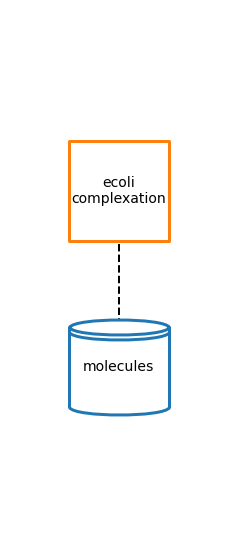

In [31]:
from vivarium.plots.topology import plot_topology

complexation_topology_settings = {
    'buffer': 2,
    'node_labels': {
        'ecoli-complexation': 'ecoli\ncomplexation'
    },
    'show_ports': False,
    'node_size': 10000,
    'dashed_edges': True
}

complexation_topology_fig = plot_topology(complexation, complexation_topology_settings)

# run process, plot topology, plot port schema

In [32]:
# plot ports schema
pp(complexation.ports_schema())

{ 'molecules': { '1-PFK-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 '1-PFK[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True},
                 '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]': { '_default': 0,
                                                                  '_divider': 'binomial',
                                                                  '_emit': True},
                 '2OXOGLUTARATEDEH-CPLX[c]': { '_default': 0,
                                               '_divider': 'binomial',
                                               '_emit': True},
                 '3-CH3-2-OXOBUTANOATE-OH-CH3-XFER-MONOMER[c]': { '_default': 0,
                                                                  '_divider': 'binomial',
                                                            

                 'ABC-45-CPLX[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True},
                 'ABC-46-CPLX[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True},
                 'ABC-48-CPLX[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True},
                 'ABC-49-CPLX[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True},
                 'ABC-5-CPLX[m]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'ABC-51-CPLX[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True},
       

                                         '_emit': True},
                 'ANTHRANSYNCOMPI-MONOMER[c]': { '_default': 0,
                                                 '_divider': 'binomial',
                                                 '_emit': True},
                 'ANTHRANSYNCOMPII-MONOMER[c]': { '_default': 0,
                                                  '_divider': 'binomial',
                                                  '_emit': True},
                 'APHA-CPLX[p]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True},
                 'APHA-MONOMER[p]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'APORNAP-CPLX[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'APP-UBIOX-CPLX[i]': 

                 'ASPCARBREG-MONOMER[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True},
                 'ASPCARBTRANS-CPLX[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True},
                 'ASPKINIHOMOSERDEHYDROGI-CPLX[c]': { '_default': 0,
                                                      '_divider': 'binomial',
                                                      '_emit': True},
                 'ASPKINIHOMOSERDEHYDROGI-MONOMER[c]': { '_default': 0,
                                                         '_divider': 'binomial',
                                                         '_emit': True},
                 'ASPKINIIHOMOSERDEHYDROGII-CPLX[c]': { '_default': 0,
                                                        '_divider': 'binomial',
                                   

                 'CITSYN-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True},
                 'CITTRANS-CPLX[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'CITTRANS-MONOMER[c]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True},
                 'CMTA-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'CMTB-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'COADTRI-CPLX[c]': { '_default': 0,
                                      '_divider': 'binomial',
                   

                                   '_emit': True},
                 'CPLX0-2381[o]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-238[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True},
                 'CPLX0-2401[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-240[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True},
                 'CPLX0-2423[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-2424[i]': { '_default': 0,
                                    '_divider': 'binomial',
                             

                 'CPLX0-341[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True},
                 'CPLX0-3461[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-3482[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-3501[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-3521[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-3541[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-3

                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-3971[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-3976[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-3[c]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True},
                 'CPLX0-4[i]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True},
                 'CPLX0-661[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True},
                 'CPLX0-682[c]': { '_default': 0,
                                   '_divider

                 'CPLX0-7633[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-7641[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-7642[m]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-7643[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-7645[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-7646[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX

                                    '_emit': True},
                 'CPLX0-7854[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-7870[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-7877[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-7878[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-7879[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-7882[c]': { '_default': 0,
                                    '_divider': 'binomial',
                      

                 'CPLX0-801[p]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True},
                 'CPLX0-8028[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8031[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8032[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8033[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8034[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8

                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8217[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8218[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8219[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-821[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True},
                 'CPLX0-8223[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8227[c]': { '_default': 0,
                         

                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8555[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8556[m]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8557[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8558[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8560[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True},
                 'CPLX0-8561[c]': { '_default': 0,
                      

                                            '_emit': True},
                 'DGTPTRIPHYDRO-MONOMER[c]': { '_default': 0,
                                               '_divider': 'binomial',
                                               '_emit': True},
                 'DHHB-METHYLTRANSFER-MONOMER[c]': { '_default': 0,
                                                     '_divider': 'binomial',
                                                     '_emit': True},
                 'DHPDIOXYGEN-CPLX[i]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True},
                 'DHPDIOXYGEN-MONOMER[i]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True},
                 'DIACYLGLYKIN-CPLX[i]': { '_default': 0,
                                           '_divider': 'binomial',
                                  

                 'EG10158-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10159-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10201-MONOMER[p]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10202-MONOMER[p]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10203-MONOMER[p]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10215-MONOMER[c]': { '_default': 0,
                                         '_divider': '

                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10735-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10741-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10743-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10748-MONOMER[m]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10764-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_em

                                         '_emit': True},
                 'EG10908-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10909-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10910-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10911-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10912-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG10913-MONOMER[c]': { '_default': 

                                         '_emit': True},
                 'EG11249-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG11250-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG11252-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG11254-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG11257-MONOMER[m]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG11261-MONOMER[c]': { '_default': 

                                         '_emit': True},
                 'EG11569-MONOMER[o]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG11580-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG11597-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG11598-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG11643-MONOMER[i]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG11652-MONOMER[i]': { '_default': 

                 'EG12256-MONOMER[i]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG12259-MONOMER[i]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG12260-MONOMER[i]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG12279-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG12282-MONOMER[i]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'EG12283-MONOMER[p]': { '_default': 0,
                                         '_divider': '

                 'FHUD-MONOMER[p]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'FLAGELLAR-MOTOR-COMPLEX[j]': { '_default': 0,
                                                 '_divider': 'binomial',
                                                 '_emit': True},
                 'FLGB-FLAGELLAR-MOTOR-ROD-PROTEIN[j]': { '_default': 0,
                                                          '_divider': 'binomial',
                                                          '_emit': True},
                 'FLGC-FLAGELLAR-MOTOR-ROD-PROTEIN[j]': { '_default': 0,
                                                          '_divider': 'binomial',
                                                          '_emit': True},
                 'FLGF-FLAGELLAR-MOTOR-ROD-PROTEIN[j]': { '_default': 0,
                                                          '_divider': 'binomial',
                

                                       '_emit': True},
                 'G6278-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G6281-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G6285-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G6286-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G6303-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G6306-MONOMER[c]': { '_default': 0,
                               

                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G6811-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G6845-MONOMER[i]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G6846-MONOMER[i]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G6847-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G6848-MONOMER[i]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G686

                 'G7288-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G7292-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G7314-MONOMER[i]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G7320-MONOMER[o]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G7325-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G7327-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                       

                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G7682-MONOMER[p]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G7685-MONOMER[i]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G7686-MONOMER[m]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G7689-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G7696-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True},
                 'G770

                 'GLUTDECARBOXA-MONOMER[c]': { '_default': 0,
                                               '_divider': 'binomial',
                                               '_emit': True},
                 'GLUTDECARBOXB-CPLX[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True},
                 'GLUTDECARBOXB-MONOMER[c]': { '_default': 0,
                                               '_divider': 'binomial',
                                               '_emit': True},
                 'GLUTKIN-CPLX[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'GLUTKIN-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'GLUTRNAREDUCT-MONOMER[c]': { '_default': 0,
            

                                      '_emit': True},
                 'HISS-CPLX[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True},
                 'HISS-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'HISTDEHYD-CPLX[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True},
                 'HISTDEHYD-MONOMER[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True},
                 'HISTPHOSTRANS-CPLX[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True},
                 'HISTPHOSTRANS-MONOMER[c]': { '_default': 0,
         

                                                       '_divider': 'binomial',
                                                       '_emit': True},
                 'METI-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'METNIQ-METHIONINE-ABC-CPLX[o]': { '_default': 0,
                                                    '_divider': 'binomial',
                                                    '_emit': True},
                 'METQ-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'MGLA-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'MGLB-MONOMER[p]': { '_default': 0,
                                      '_divider': 'binomial',
                 

                 'NIRD-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'NITRATREDUCTA-CPLX[i]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True},
                 'NITRATREDUCTZ-CPLX[i]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True},
                 'NITRITREDUCT-CPLX[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True},
                 'NRDA-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'NRDACTMULTI-CPLX[c]': { '_default': 0,
                                          '_div

                 'PABASYN-COMPII-MONOMER[c]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True},
                 'PABASYN-CPLX[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'PANTEPADENYLYLTRAN-MONOMER[c]': { '_default': 0,
                                                    '_divider': 'binomial',
                                                    '_emit': True},
                 'PANTOATE-BETA-ALANINE-LIG-CPLX[c]': { '_default': 0,
                                                        '_divider': 'binomial',
                                                        '_emit': True},
                 'PANTOATE-BETA-ALANINE-LIG-MONOMER[c]': { '_default': 0,
                                                           '_divider': 'binomial',
                                         

                 'PPX-CPLX[i]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True},
                 'PPX-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True},
                 'PROP-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'PROS-CPLX[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True},
                 'PROS-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'PROTEIN-NRII[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
          

                                                   '_divider': 'binomial',
                                                   '_emit': True},
                 'RIBOKIN-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'RIBONUCLEOSIDE-DIP-REDUCTI-CPLX[c]': { '_default': 0,
                                                         '_divider': 'binomial',
                                                         '_emit': True},
                 'RIBONUCLEOSIDE-DIP-REDUCTII-CPLX[c]': { '_default': 0,
                                                          '_divider': 'binomial',
                                                          '_emit': True},
                 'RIBONUCLEOSIDE-TRIP-REDUCT-CPLX[c]': { '_default': 0,
                                                         '_divider': 'binomial',
                                                         '_emit': True},

                 'SPERMIDINESYN-CPLX[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True},
                 'SPERMIDINESYN-MONOMER[c]': { '_default': 0,
                                               '_divider': 'binomial',
                                               '_emit': True},
                 'SRP-CPLX[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True},
                 'SUCC-DEHASE[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True},
                 'SUCCARGDIHYDRO-MONOMER[c]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True},
                 'SUCCCOASYN-ALPHA[c]': { '_default': 0,
                                      

                 'TRANSALDOLB-CPLX[c]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True},
                 'TRANSALDOLB-MONOMER[c]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True},
                 'TRANSKETOI-CPLX[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True},
                 'TRANSKETOI-MONOMER[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True},
                 'TRANSKETOII-MONOMER[c]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True},
                 'TREB-MONOMER[i]': { '_default': 0,
                     

                                      '_emit': True},
                 'YBDE-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YBHF-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YBHR-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YBHS-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YCBE-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YCBM-MONOMER[m]': { '_default': 0,
                                      '_divider'

                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YPHD-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YPHE-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YRAO-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YRBE-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YRBF-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True},
                 'YTFQ-MONOMER[p]': { '

In [ ]:
# run simulation and retrieve final data
complexation_settings = {
    'total_time': 600,
    'initial_state': initial_state,
    'topology': complexation_topology}

complexation_data = simulate_process(complexation, complexation_settings)

# print('\nsimulation output:')
#pp(data['bulk'])

In [ ]:
# plot output
complexation_fig = plot_variables(
    complexation_data, 
    variables=[
        ('bulk', '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]'), 
        ('bulk', '2OXOGLUTARATEDEH-CPLX[c]'), 
        ('bulk', '3-ISOPROPYLMALISOM-CPLX[c]')],
    column_width=10, row_height=3, row_padding=0.5)

# Ecoli master composite

## load the composer
 * A `Composer` is a class that generates `Composite` models, with many processes wired together through shared `Stores`.
 * `Ecoli` is the current master composite of the E. coli model.

In [9]:
from ecoli.composites.ecoli_master import Ecoli

ecoli_config = {
    'agent_id': '1',
    '_schema': {
        'equilibrium': {
            'molecules': {
                'PD00413[c]': {
                    '_updater': 'nonnegative_accumulate'
                }
            }
        }
    },
    'sim_data_path': SIM_DATA_PATH}
ecoli_composer = Ecoli(ecoli_config)

## plot Ecoli's topology

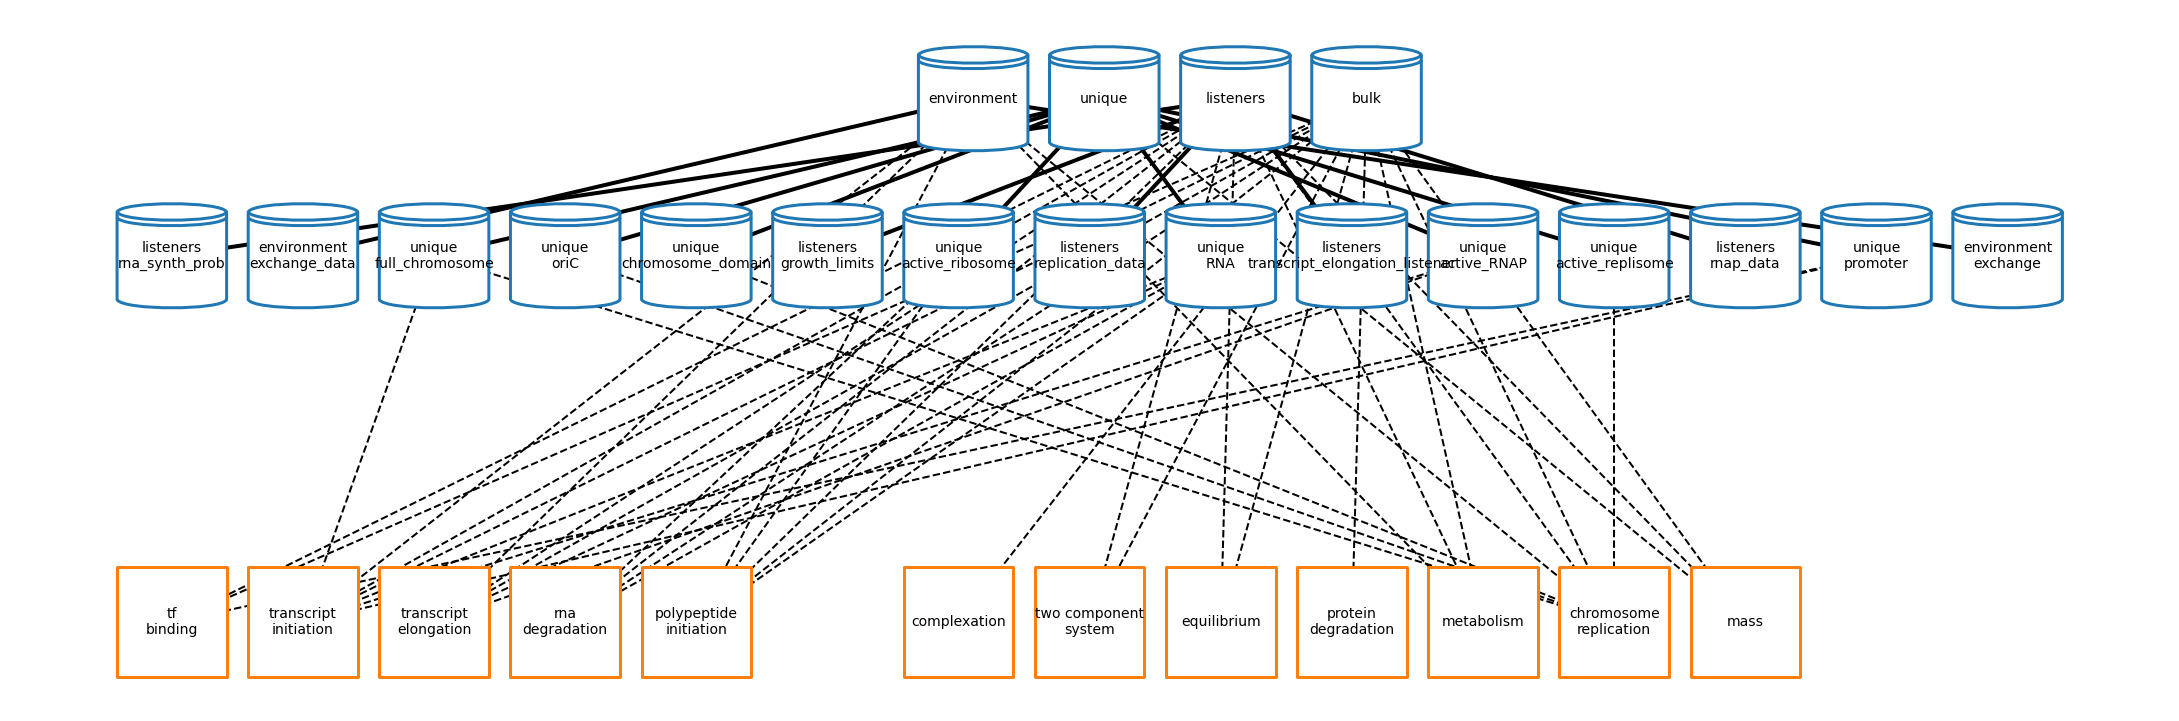

In [10]:
from ecoli.composites.ecoli_master import ecoli_topology_plot
topology_plot = ecoli_topology_plot(config=ecoli_config)

# initialize the simulation

In [11]:
ecoli = ecoli_composer.generate()
ecoli_simulation = Engine({
    'processes': ecoli.processes,
    'topology': ecoli.topology,
    'initial_state': initial_state,
    'progress_bar': True,
})


Simulation ID: ec61a200-f185-11eb-abc7-3c15c2dc0586
Created: 07/30/2021 at 15:31:51


/Users/abhinavkumar/.pyenv/versions/3.8.5/envs/v-ecoli/lib/python3.8/site-packages/vivarium_core-0.3.1-py3.8.egg/vivarium/core/engine.py:362: UserWarning: configuration size is too big for the emitter, discarding process parameters
  warnings.warn('configuration size is too big for the emitter, '


## run the simulation

In [12]:
total_time = 10
ecoli_simulation.update(total_time)

Progress:|██████████████████████████████████████████████████| 0.0/10.0 simulated seconds remaining    
Completed in 31.10 seconds


## retrieve the simulation output

In [13]:
# retrieve it in "data" format 
ecoli_sim_data = ecoli_simulation.emitter.get_data()

# retrieve it in "timeseries" format 
ecoli_sim_timeseries = ecoli_simulation.emitter.get_timeseries()

{ 'cell_mass': [ 1166.0428635190078,
                 1166.2134557209909,
                 1166.347752666424,
                 1166.5300830794795,
                 1166.7306295517349,
                 1166.9979809293045],
  'dry_mass': [ 346.6131797067766,
                346.62080024745785,
                346.63388543151893,
                346.7005984146607,
                346.76123571570463,
                346.8533024882197],
  'water_mass': [ 819.4296838122312,
                  819.592655473533,
                  819.713867234905,
                  819.8294846648188,
                  819.9693938360302,
                  820.1446784410848]}


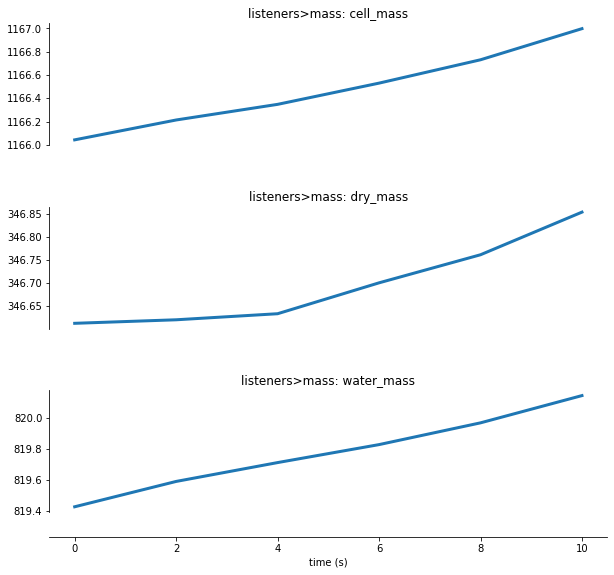

In [14]:
# print output of the mass store under listeners
pp(ecoli_sim_timeseries['listeners']['mass'])

# plot output
fig = plot_variables(
    ecoli_sim_timeseries, 
    variables=[
        ('listeners', 'mass','cell_mass'), 
        ('listeners', 'mass','dry_mass'), 
        ('listeners', 'mass','water_mass')],
    column_width=10, row_height=3, row_padding=0.5)